In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Vietnam-Macroeconomic-Data.xls", header=None)

In [3]:
df = df.transpose()

In [4]:
df = df.rename(columns={0:'Year', 1:'GDP', 2:'UR'}).drop(df.index[0])

In [5]:
df['UR'] = df['UR'].map(lambda x: -1 if x == 'no data' else float(x))

In [6]:
df['Year'] = df['Year'].astype(int)
df['GDP'] = df['GDP'].astype(float)

In [7]:
df = df.set_index('Year')

In [8]:
nonna_df = df[df['UR'] != -1]

In [9]:
nonna_df.cov()

,GDP,UR
GDP,5406.645724,-174.571634
UR,-174.571634,8.151059


In [10]:
nonna_df.corr()

,GDP,UR
GDP,1.000000,-0.831577
UR,-0.831577,1.000000


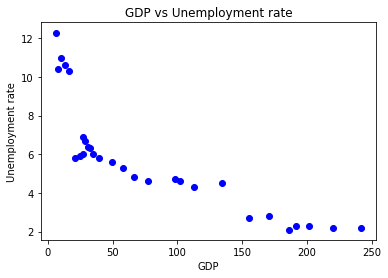

In [32]:
plt.scatter(nonna_df['GDP'], nonna_df['UR'], c='b')
plt.xlabel("GDP")
plt.ylabel("Unemployment rate")
plt.title("GDP vs Unemployment rate")
plt.show()

## Visualization

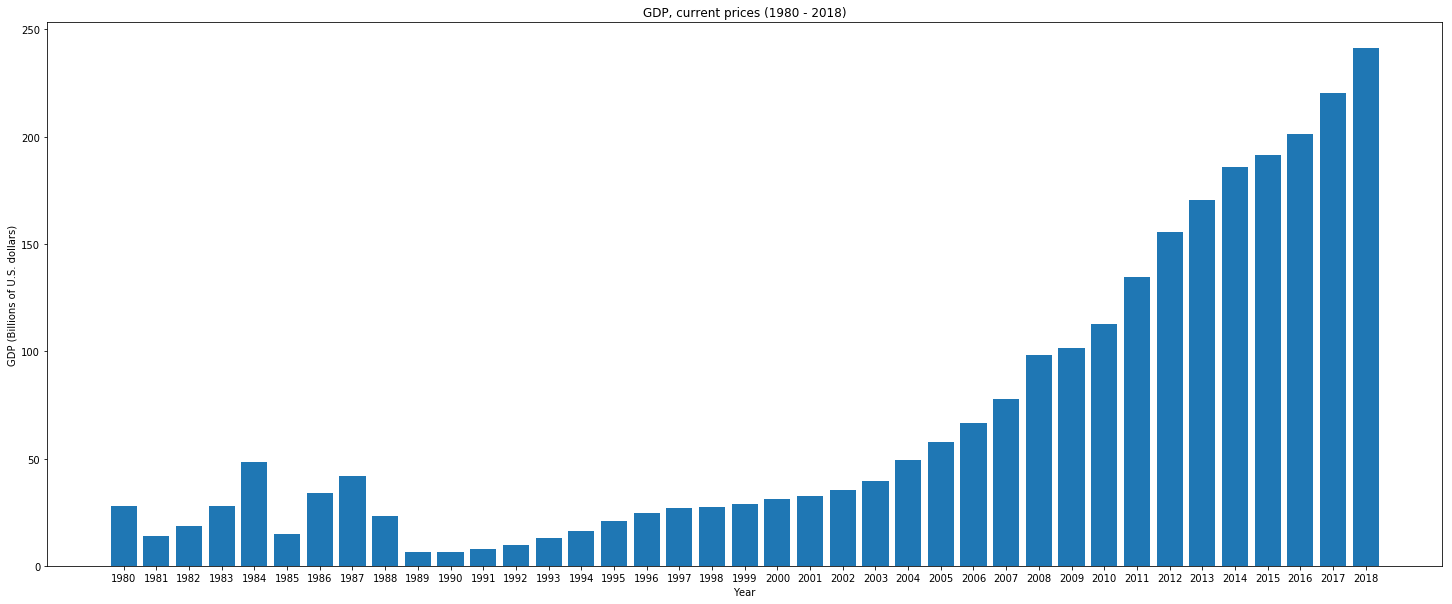

In [12]:
# GDP

idx = range(len(df))
plt.figure(figsize=(25,10))
plt.bar(idx, df['GDP'])
plt.xticks(idx, df.index)
plt.xlabel("Year")
plt.ylabel("GDP (Billions of U.S. dollars)")
plt.title("GDP, current prices (1980 - 2018)")
plt.show()

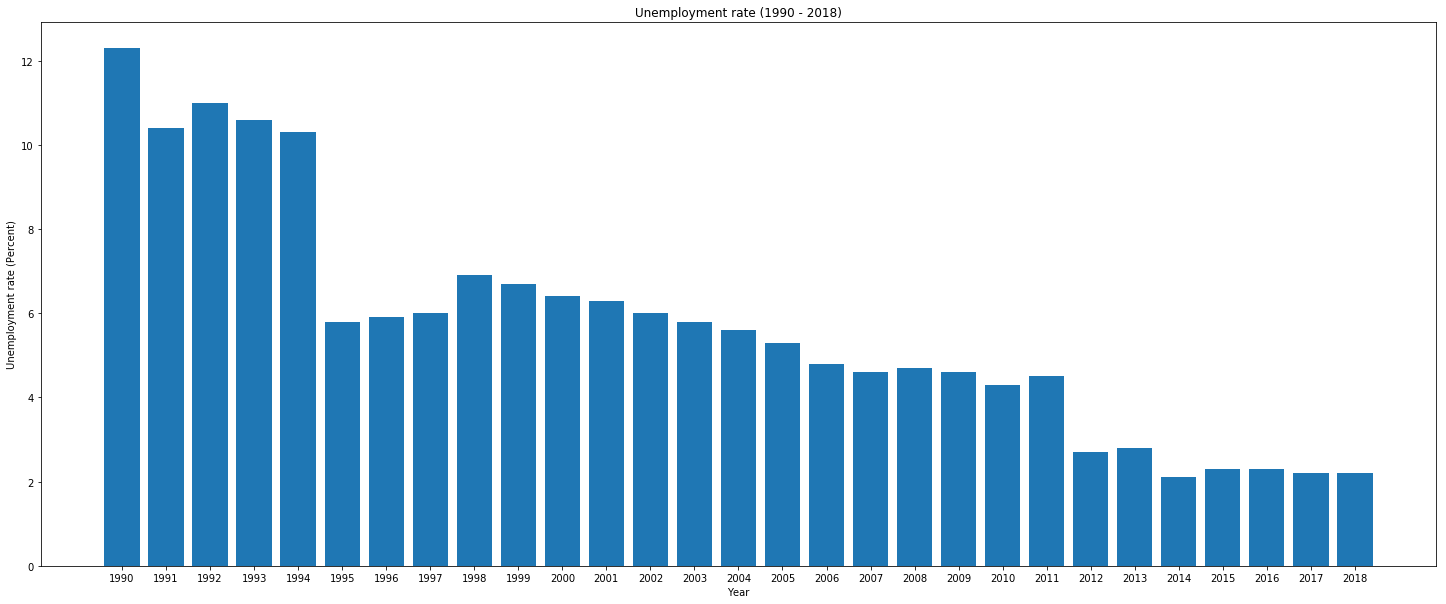

In [13]:
# Unemployment rate (only for data from 1990 to 2018)

idx = range(len(nonna_df))
plt.figure(figsize=(25,10))
plt.bar(idx, nonna_df['UR'])
plt.xticks(idx, nonna_df.index)
plt.xlabel("Year")
plt.ylabel("Unemployment rate (Percent)")
plt.title("Unemployment rate (1990 - 2018)")
plt.show()

## Feature Extraction

In [14]:
# GDP growth rate

final = df['GDP'].values
initial = np.roll(final, 1)
initial[0] = final[0]
gdp_growth_rate = (final - initial) * 100.0 / initial

In [15]:
df['GGR'] = gdp_growth_rate

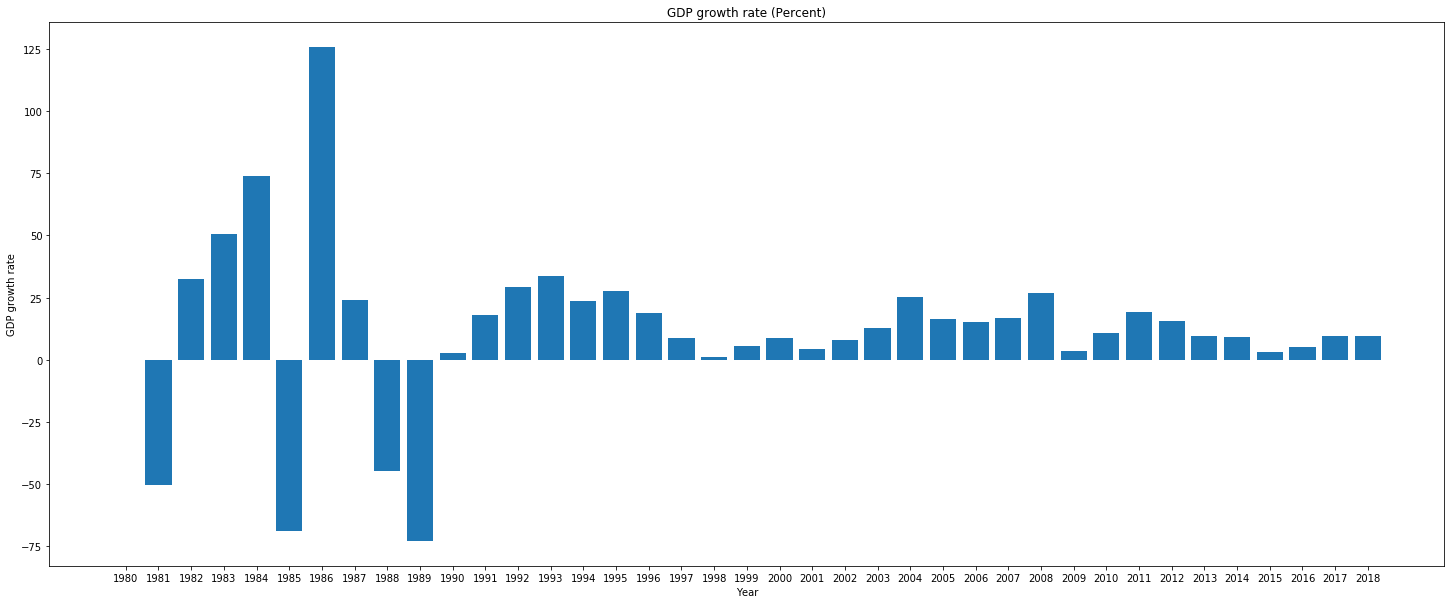

In [16]:
# GDP growth rate

idx = range(len(df))
plt.figure(figsize=(25,10))
plt.bar(idx, df['GGR'])
plt.xticks(idx, df.index)
plt.xlabel("Year")
plt.ylabel("GDP growth rate")
plt.title("GDP growth rate (Percent)")
plt.show()

In [17]:
# Unemployment growth rate (only from 1990 to 2018)

final = nonna_df['UR'].values
initial = np.roll(final, 1)
initial[0] = final[0]
unemployment_growth_rate = (final - initial) * 100.0 / initial

In [18]:
nonna_df['UGR'] = unemployment_growth_rate

/home/vdat/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


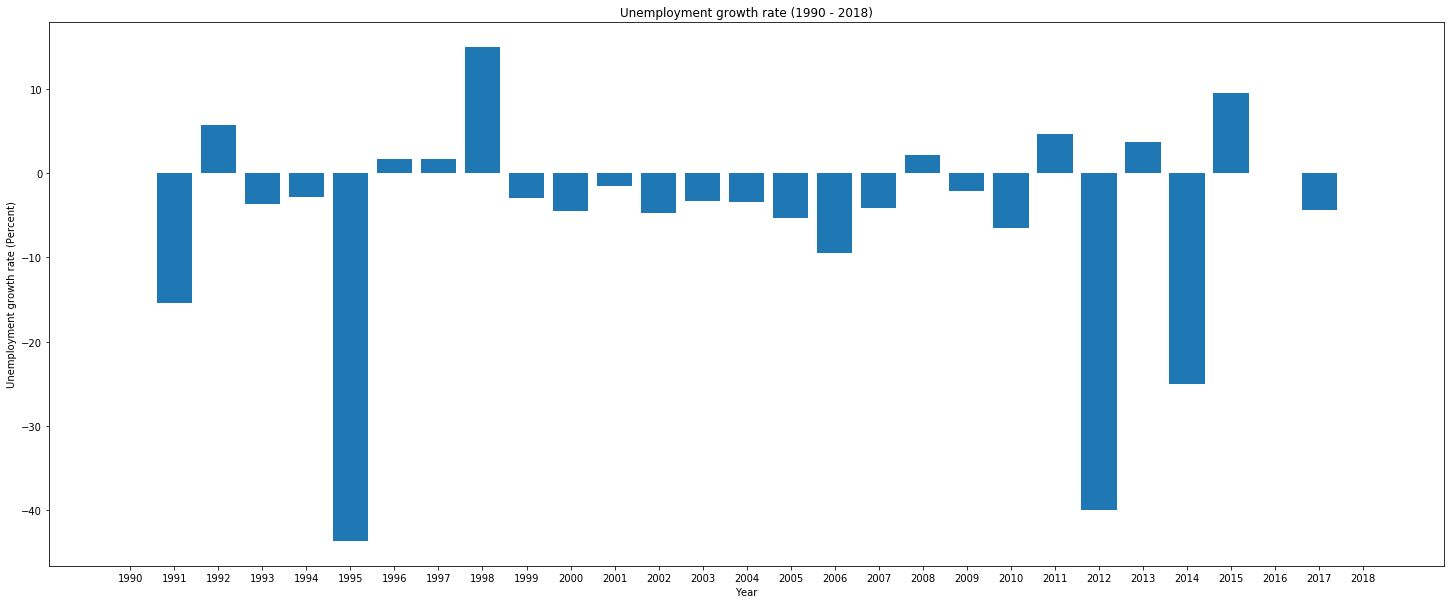

In [19]:
# Unemployment growth rate

idx = range(len(nonna_df))
plt.figure(figsize=(25,10))
plt.bar(idx, nonna_df['UGR'])
plt.xticks(idx, nonna_df.index)
plt.xlabel("Year")
plt.ylabel("Unemployment growth rate (Percent)")
plt.title("Unemployment growth rate (1990 - 2018)")
plt.show()

## Predict missing value

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X = df[['GDP', 'GGR']].values
y = df[['UR']].values

In [22]:
X_train = X[10:]
y_train = y[10:]

In [23]:
X_missing = X[:10]

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
missing_ur = df[df['UR'] == -1][['GDP', 'GGR']].values

In [26]:
predict_ur = linreg.predict(X_missing).reshape(-1)

In [27]:
predict_ur

array([ 6.97195997,  5.85922742,  8.27268272,  8.53767097,  8.61433097,
        5.24773833, 10.66544231,  7.27427079,  5.73562387,  5.39377714])

In [28]:
# fill missing value

for i in range(len(predict_ur)):
    df.iloc[i]['UR'] = predict_ur[i]

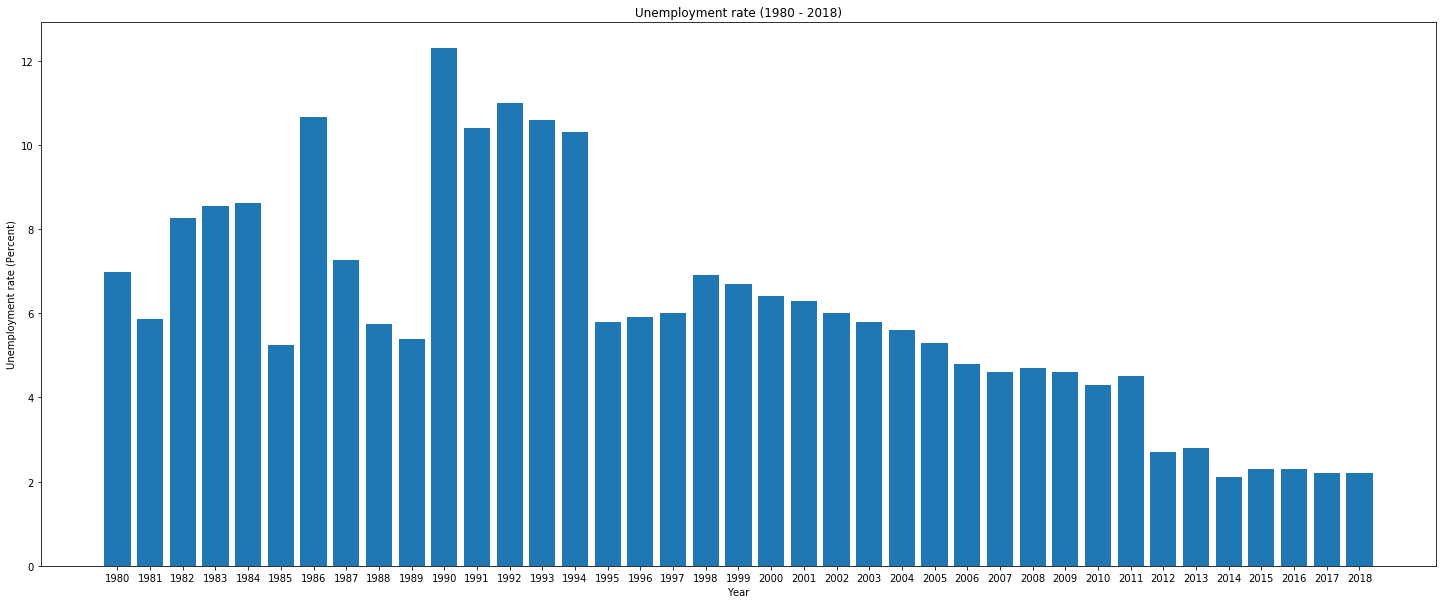

In [29]:
# Unemployment rate

idx = range(len(df))
plt.figure(figsize=(25,10))
plt.bar(idx, df['UR'])
plt.xticks(idx, df.index)
plt.xlabel("Year")
plt.ylabel("Unemployment rate (Percent)")
plt.title("Unemployment rate (1980 - 2018)")
plt.show()

In [42]:
print("unemployment_rate = %.4f*gdp + %.4f*gdp_growth_rate + %.4f" % (linreg.coef_[0,0], linreg.coef_[0,1], linreg.intercept_[0]))

unemployment_rate = -0.0311*gdp + 0.0308*gdp_growth_rate + 7.8384
